In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('crime.csv',encoding='latin1')

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
len(df['OFFENSE_CODE_GROUP'].unique())

67

In [ ]:
#considering the top 10 frequent crime groups only
crime_groups = df['OFFENSE_CODE_GROUP'].value_counts().nlargest(10).index
subset_df = df[df['OFFENSE_CODE_GROUP'].isin(crime_groups)]

# 1.Peak hours of crime

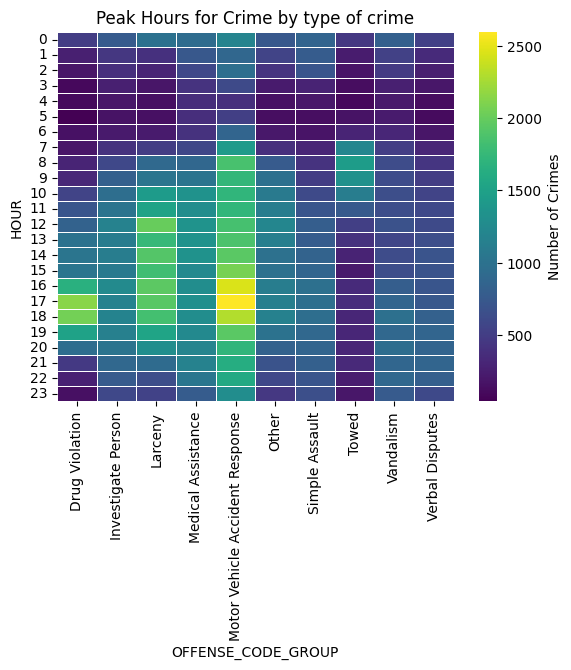

In [ ]:
sns.heatmap(subset_df.pivot_table(index='HOUR', columns='OFFENSE_CODE_GROUP', aggfunc='size'), cmap='viridis', cbar_kws={'label': 'Number of Crimes'},linewidths=0.5)
plt.title('Peak Hours for Crime by type of crime')
plt.show()

# 2. Crime Frequency weekends and weekday

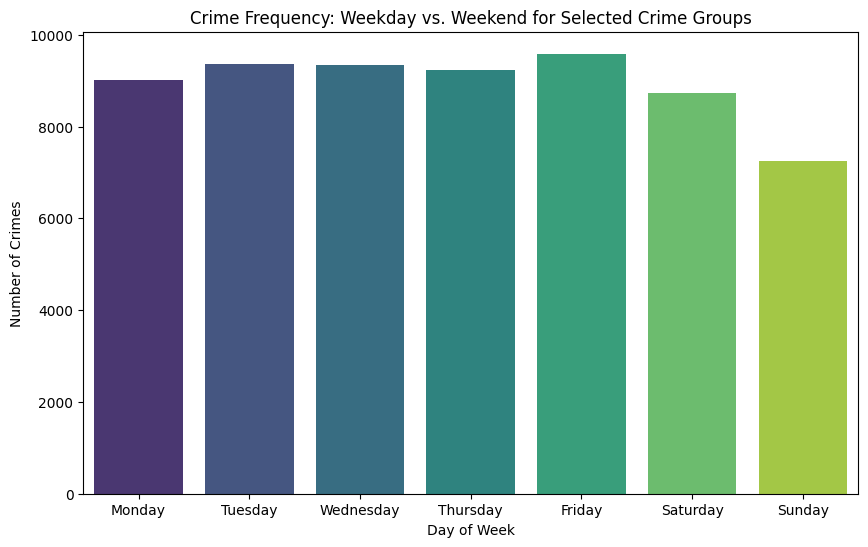

In [ ]:
#selecting a set of crime groups
crime_groups = ['Larceny', 'Vandalism', 'Robbery', 'Burglary', 'Drug Violation']
subset_df = df[df['OFFENSE_CODE_GROUP'].isin(crime_groups)]

plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=subset_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Crime Frequency: Weekday vs. Weekend for Selected Crime Groups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()

# 3. Crime group Frequency by district

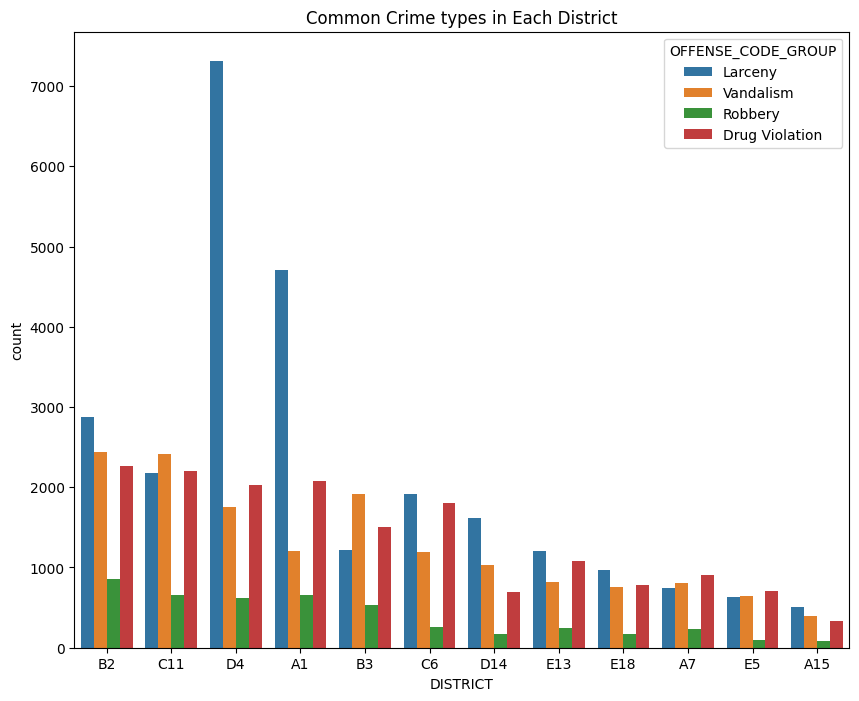

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='DISTRICT', hue='OFFENSE_CODE_GROUP', data=subset_df, order=df['DISTRICT'].value_counts().index)
plt.title('Common Crime types in Each District')
plt.show()

# 4. Crime rate by district

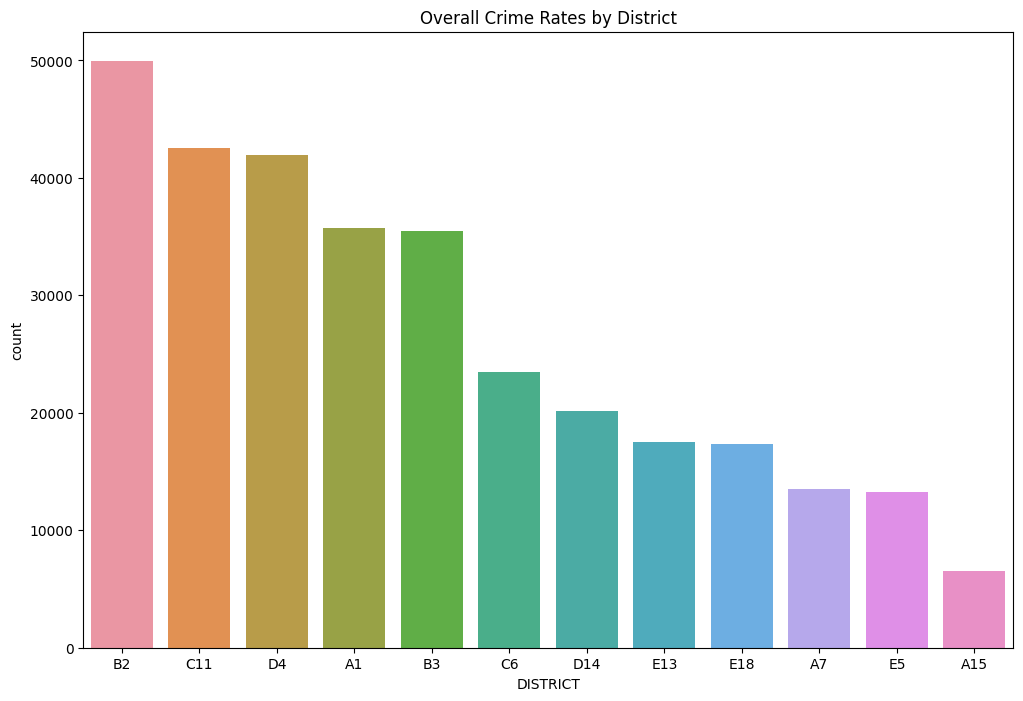

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='DISTRICT', data=df, order=df['DISTRICT'].value_counts().index)
plt.title('Overall Crime Rates by District')
plt.show()

# 5. Crime rate trend over years

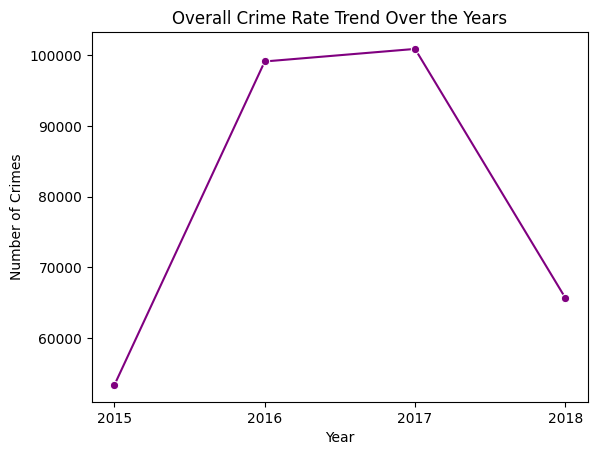

In [ ]:
crime_count_by_year = df['YEAR'].value_counts().sort_index()
sns.lineplot(x=crime_count_by_year.index, y=crime_count_by_year.values, marker='o', color='purple')
plt.title('Overall Crime Rate Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_count_by_year.index, labels= crime_count_by_year.index)
plt.show()

# 6. Crime Rate by month

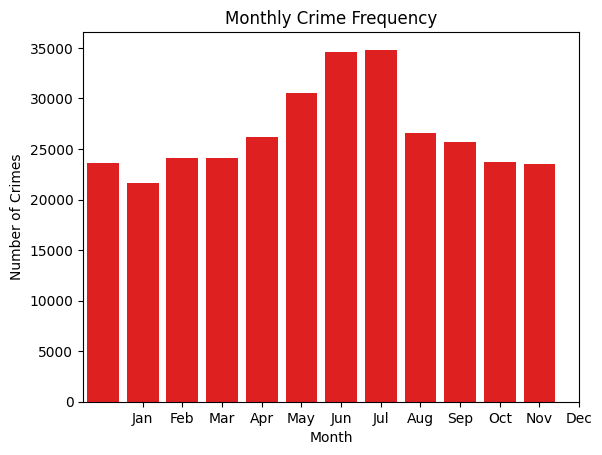

In [ ]:
crime_count_by_month = df['MONTH'].value_counts().sort_index()
sns.barplot(x=crime_count_by_month.index, y=crime_count_by_month.values,color='red')
plt.title('Monthly Crime Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 7. Trends in shooting

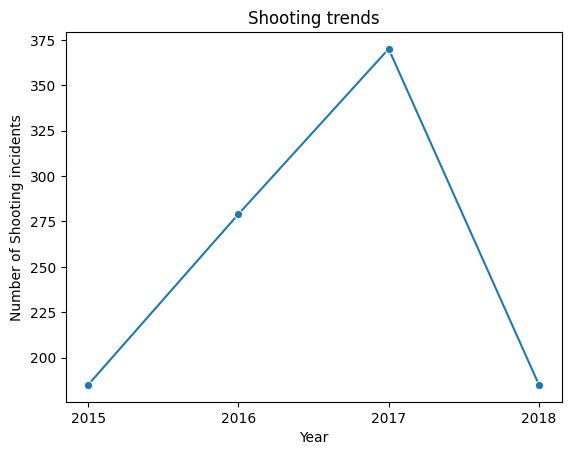

In [ ]:
#incidents where shooting has happened
shooting_df = df[df['SHOOTING'] == 'Y']
shooting_count_by_year = shooting_df['YEAR'].value_counts().sort_index()
sns.lineplot(x=shooting_count_by_year.index, y=shooting_count_by_year.values, marker='o')
plt.title('Shooting trends')
plt.xlabel('Year')
plt.ylabel('Number of Shooting incidents')
plt.xticks(shooting_count_by_year.index, labels= shooting_count_by_year.index)
plt.show()

In [ ]:
shooting_count_by_year

2015    185
2016    279
2017    370
2018    185
Name: YEAR, dtype: int64